In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("whitegrid")

In [2]:
def generate_data(N):
    return np.random.uniform(low=-1, size=(N, 2))

In [3]:
x = generate_data(10)

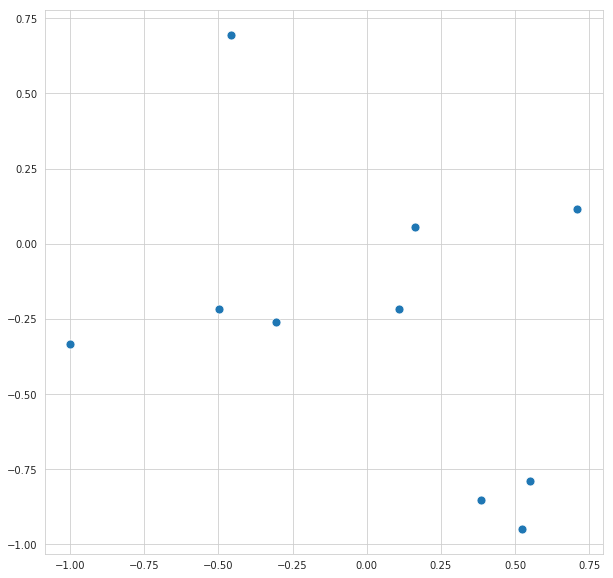

In [7]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=x[:, 0], y=x[:, 1], s=80)

In [8]:
def define_line(x):
    idxs = np.random.choice(np.arange(x.shape[0]), size=2, replace=False)
    points = x[idxs]
    
    xs = points[:, 0]
    ys = points[:, 1]
    
    coeff = np.polyfit(xs, ys, 1)
    
    g = np.poly1d(coeff)
    
    return g

In [9]:
g = define_line(x)

(-1, 1)

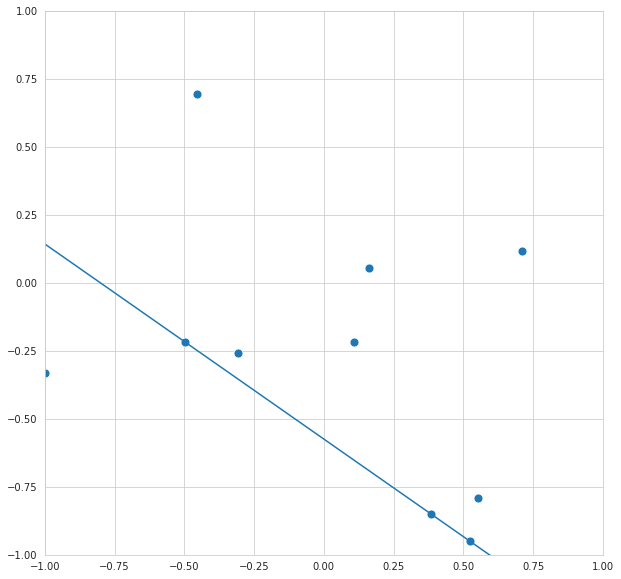

In [11]:
xx = np.linspace(-1, 1, 100)

plt.figure(figsize=(10, 10))
plt.ylim(-1, 1)
plt.xlim(-1, 1)

sns.scatterplot(x=x[:, 0], y=x[:, 1], s=80)
sns.lineplot(xx, g(xx))
plt.ylim(-1, 1)
plt.xlim(-1, 1)

In [13]:
def create_dataframe(x, g):
    df = pd.DataFrame(data=x, columns=['x', 'y'])
    df['bias'] = np.ones(df.shape[0]).astype('int')
    
    point_class = lambda x: 1 if g(x[0]) >= x[1] else -1
    
    df['class'] = df[['x', 'y']].apply(point_class, axis=1)
    
    return df

In [14]:
df = create_dataframe(x, g)

(-1, 1)

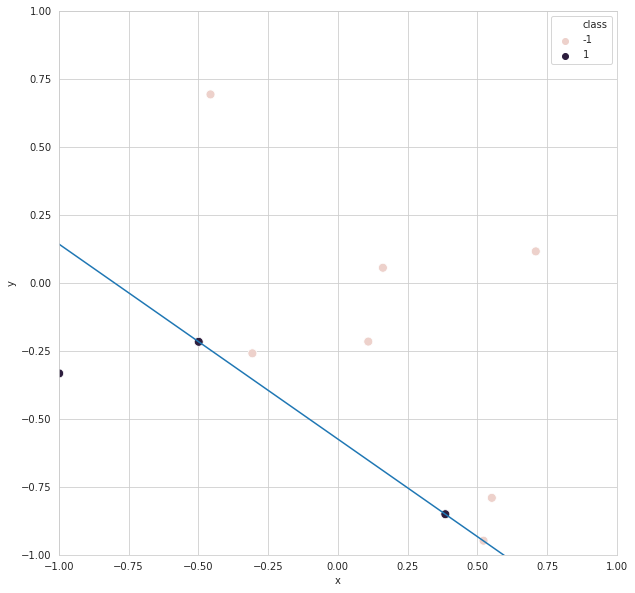

In [15]:
xx = np.linspace(-1, 1, 100)

plt.figure(figsize=(10, 10))
plt.ylim(-1, 1)
plt.xlim(-1, 1)

sns.scatterplot(x='x', y='y', data=df, hue='class', legend='full', s=80)
sns.lineplot(xx, g(xx))
plt.ylim(-1, 1)
plt.xlim(-1, 1)

In [16]:
w = np.zeros(3)

h = lambda x, w: np.sign(x @ w)

In [17]:
iters = list()

for _ in range(1000):
    it = 0
    x = generate_data(10)
    g = define_line(x)
    df = create_dataframe(x, g)

    while True:
        y_pred = h(df[['x', 'y', 'bias']], w)
        check_y_pred_vs_y_true = np.equal(y_pred, df['class'].values)
        wrong_examples = np.where(check_y_pred_vs_y_true == False)[0]

        if wrong_examples.shape[0] == 0:
            break

        random_example_idx = np.random.choice(wrong_examples)
        random_example = df[['x', 'y', 'bias']].iloc[random_example_idx]

        w += random_example.values * df['class'].iloc[random_example_idx]

        it += 1
    
    if _ % 100 == 0:
        print(_)

    iters.append(it)

0
100
200
300
400
500


KeyboardInterrupt: 